In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model as lm

In [2]:
df = pd.read_csv('hiring.csv')
df

experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0        NaN                    8.0                           9      50000
1        NaN                    8.0                           6      45000
2       five                    6.0                           7      60000
3        two                   10.0                          10      65000
4      seven                    9.0                           6      70000
5      three                    7.0                          10      62000
6        ten                    NaN                           7      72000
7     eleven                    7.0                           8      80000

In [3]:
df['experience'] = [0,0,5,2,7,3,10,11]
df

experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0           0                    8.0                           9      50000
1           0                    8.0                           6      45000
2           5                    6.0                           7      60000
3           2                   10.0                          10      65000
4           7                    9.0                           6      70000
5           3                    7.0                          10      62000
6          10                    NaN                           7      72000
7          11                    7.0                           8      80000

In [4]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(math.floor(df['test_score(out of 10)'].median()))
df

experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0           0                    8.0                           9      50000
1           0                    8.0                           6      45000
2           5                    6.0                           7      60000
3           2                   10.0                          10      65000
4           7                    9.0                           6      70000
5           3                    7.0                          10      62000
6          10                    8.0                           7      72000
7          11                    7.0                           8      80000

In [5]:
reg = lm.LinearRegression()
reg.fit(df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']], df['salary($)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
reg.predict([[2, 9, 6]]) #2year of experience, 9 test score, 6 interview score

array([53205.96797671])

In [7]:
reg.predict([[12, 10, 10]]) #12 years of experience, test score 10, interview score 10

array([92002.18340611])

In [8]:
reg.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [9]:
reg.intercept_

17737.263464337695

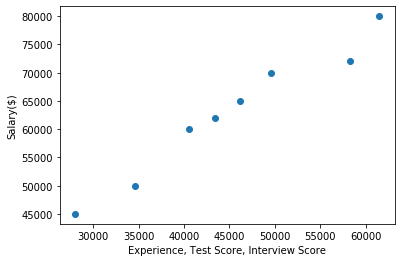

In [10]:
%matplotlib inline
plt.xlabel('Experience, Test Score, Interview Score')
plt.ylabel('Salary($)')
plt.scatter(((df['experience'] * reg.coef_[0]) + (df['test_score(out of 10)'] * reg.coef_[1]) + (df['interview_score(out of 10)'] * reg.coef_[2])), df['salary($)'])

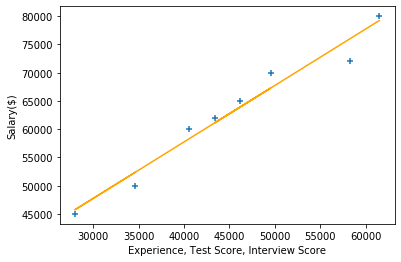

In [11]:
%matplotlib inline
plt.xlabel('Experience, Test Score, Interview Score')
plt.ylabel('Salary($)')
plt.scatter(((df['experience'] * reg.coef_[0]) + (df['test_score(out of 10)'] * reg.coef_[1]) + (df['interview_score(out of 10)'] * reg.coef_[2])), df['salary($)'], marker = '+')
plt.plot(((df['experience'] * reg.coef_[0]) + (df['test_score(out of 10)'] * reg.coef_[1]) + (df['interview_score(out of 10)'] * reg.coef_[2])), reg.predict(df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]), color = 'orange')